In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

def print_mae_report(title, values):
    print('-------')
    print(title)
    
    if values.size > 0:
        improved_ratio = np.count_nonzero(values < 0) / values.size

        print(f'Score improved on {improved_ratio}% of joints')
        print('Mean Score improvement:', np.mean(values[values < 0]), '(+/-: ', np.std(values[values < 0]), ')')
        print('Mean Score worsen:', np.mean(values[values > 0]), '(+/-: ', np.std(values[values > 0]), ')')

        plt.figure(figsize = (8, 8))
        plt.hist([np.absolute(values[values < 0]), values[values > 0]], label=['Improved', 'Worsened'])
        plt.xlabel('MAE change')
        plt.ylabel('Number of joints')
        plt.legend()
        plt.title(title)
        plt.show()
    
    print('-------')

def print_report(truth, submitted_version, new_version):
    previos = submitted_version.merge(truth, how = 'inner', on  = 'Patient_ID')
    new = new_version.merge(truth, how = 'inner', on  = 'Patient_ID')

    print('Previous R2:', r2_score(previos['Overall_Tol_y'], previos['Overall_Tol_x']))
    print('New R2:', r2_score(new['Overall_Tol_y'], new['Overall_Tol_x']))
    
    print('Previous Narrowing R2:', r2_score(previos['Overall_narrowing_y'], previos['Overall_narrowing_x']))
    print('New Narrowing R2:', r2_score(new['Overall_narrowing_y'], new['Overall_narrowing_x']))
    
    print('Previous Erosion R2:', r2_score(previos['Overall_erosion_y'], previos['Overall_erosion_x']))
    print('New Erosion R2:', r2_score(new['Overall_erosion_y'], new['Overall_erosion_x']))
    
    print('Previous Overall MAE:', np.mean(np.absolute(previos['Overall_Tol_x'] - previos['Overall_Tol_y'])))
    print('New Overall MAE:', np.mean(np.absolute(new['Overall_Tol_x'] - new['Overall_Tol_y'])))
    
    truth_filter = ['_y' in column for column in previos.columns]
    pred_filter = ['_x' in column for column in previos.columns]
    
    narr_filter = ['J' in column for column in previos.columns]
    eros_filter = ['E' in column for column in previos.columns]
    
    hand_filter = ['H' in column for column in previos.columns]
    wrist_filter = ['wrist' in column for column in previos.columns]
    feet_filter = ['F' in column for column in previos.columns]
    
    hand_narrowing_filter = np.logical_and(narr_filter, hand_filter)
    wrists_narrowing_filter = np.logical_and(narr_filter, wrist_filter)
    feet_narrowing_filter = np.logical_and(narr_filter, feet_filter)
    
    hand_erosion_filter = np.logical_and(eros_filter, hand_filter)
    wrists_erosion_filter = np.logical_and(eros_filter, wrist_filter)
    feet_erosion_filter = np.logical_and(eros_filter, feet_filter)
    
    print('-------')
    print('Previous Hand Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    
    print('Previous Wrist Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    print('Previous Feet Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    
    print('-------')
    print('Previous Hand Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    print('Previous Wrist Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('-------')
    print('Previous Feet Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('-------')
    
    plt.figure(figsize = (8, 8))
    plt.scatter(previos['Overall_Tol_x'], previos['Overall_Tol_y'], label = 'Previous')
    plt.scatter(new['Overall_Tol_x'], new['Overall_Tol_y'], label = 'New')
    plt.plot([0, 350], [0, 350])
    plt.xlabel('Predictions')
    plt.ylabel('Ground Truth')
    plt.legend()
    
    is_smaller_count = 0
    no_joints = 0

    joints = []
    
    narrowing_hands = []
    narrowing_wrists = []
    narrowing_feet = []
    
    erosion_hands = []
    erosion_wrists = []
    erosion_feet = []
    
    for column in truth.columns[4:]:
        v1_mae = np.mean(np.absolute(previos[column + '_x'] - previos[column + '_y']))
        adam_adapted_weights_mae = np.mean(np.absolute(new[column + '_x'] - new[column + '_y']))

        diff = adam_adapted_weights_mae - v1_mae
        
        if adam_adapted_weights_mae != v1_mae:
            joints.append(diff)
            
            is_erosion = '_E_' in column
            
            if 'H' in column:
                if 'wrist' in column:
                    if is_erosion:
                        erosion_wrists.append(diff)
                    else:
                        narrowing_wrists.append(diff)
                else:
                    if is_erosion:
                        erosion_hands.append(diff)
                    else:
                        narrowing_hands.append(diff)
            else:
                if is_erosion:
                    erosion_feet.append(diff)
                else:
                    narrowing_feet.append(diff)
                    
    joints = np.array(joints)
    narrowing_hands = np.array(narrowing_hands)
    narrowing_wrists = np.array(narrowing_wrists)
    narrowing_feet = np.array(narrowing_feet)
    erosion_hands = np.array(erosion_hands)
    erosion_wrists = np.array(erosion_wrists)
    erosion_feet = np.array(erosion_feet)
    
    print_mae_report('Overall', joints)
    print_mae_report('Narrowing Hands', narrowing_hands)
    print_mae_report('Narrowing Wrists', narrowing_wrists)
    print_mae_report('Narrowing Feet', narrowing_feet)
    print_mae_report('Erosion Hands', erosion_hands)
    print_mae_report('Erosion Wrists', erosion_wrists)
    print_mae_report('Erosion Feet', erosion_feet)

In [9]:
import pandas as pd

v1 = pd.read_csv('../trained_models/output_v1_val.csv')
truth = pd.read_csv(config.train_location + '/training.csv')
adam_adapted_weights = pd.read_csv('../trained_models/adam_adapted_weights_val_output.csv')

adam_no_weigths_output = pd.read_csv('../trained_models/adam_no_weights_val_output.csv')
adam_no_weigths_narrowing_output = pd.read_csv('../trained_models/adam_no_weights_val_combined_narrowing_output.csv')
adam_no_weights_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_val_output.csv')
adam_no_weights_comb_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_combined_narrowing_val_output.csv')

adam_no_weights_shuffle = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_output.csv')
adam_no_weights_reg_shuffle_hand_pretrain = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_hand_pretrain_val_output.csv')

Previous R2: 0.7141595889726446
New R2: 0.7536138834489792
Previous Narrowing R2: 0.8632838358917424
New Narrowing R2: 0.8720853640594071
Previous Erosion R2: 0.47104570278039537
New Erosion R2: 0.5017203755214951
Previous Overall MAE: 10.139680860068083
New Overall MAE: 9.891856627943723
-------
Previous Hand Narrowing R2 0.9061566325674564
New Hand Narrowing R2 0.8715443221138615
-------
Previous Wrist Narrowing R2 0.9266446755545681
New Wrist Narrowing R2 0.9112268038684017
-------
Previous Feet Narrowing R2 0.5976912110764925
New Feet Narrowing R2 0.7910637218549151
-------
Previous Hand Erosion R2 0.5210499083689656
New Hand Erosion R2 0.5260516463172056
-------
Previous Wrist Erosion R2 0.6542266861600035
New Wrist Erosion R2 0.4987444602072888
-------
Previous Feet Erosion R2 0.24800168323233884
New Feet Erosion R2 0.3980965337379455
-------
-------
Overall
Score improved on 0.5348837209302325% of joints
Mean Score improvement: -0.03069338642213923 (+/-:  0.024776373881811548 )


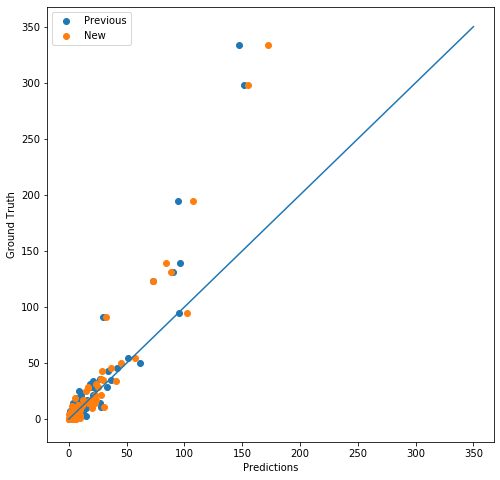

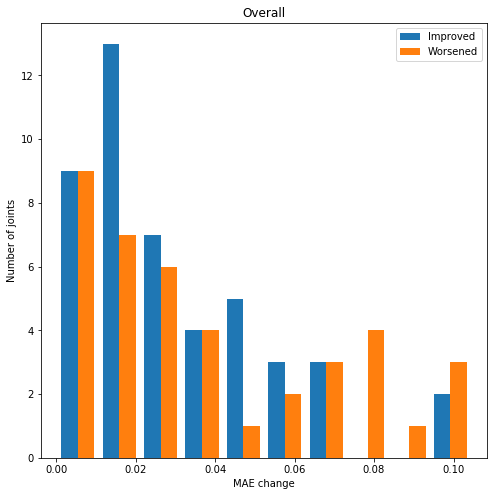

-------
-------
Narrowing Hands
Score improved on 0.2777777777777778% of joints
Mean Score improvement: -0.031043153353359387 (+/-:  0.02114272583772529 )
Mean Score worsen: 0.03308548728458857 (+/-:  0.029953008316892772 )


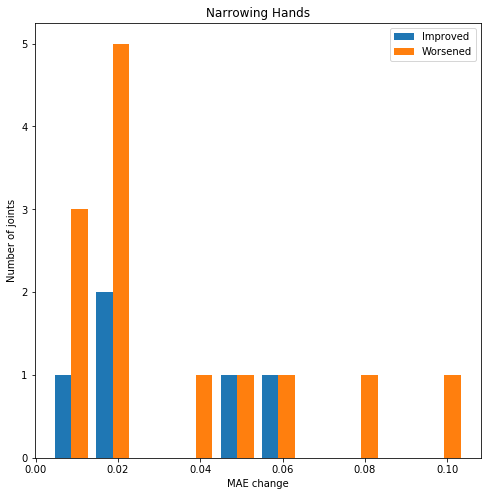

-------
-------
Narrowing Wrists
Score improved on 0.3333333333333333% of joints
Mean Score improvement: -0.04332369112450145 (+/-:  0.015309701425178648 )
Mean Score worsen: 0.049714034861054926 (+/-:  0.02095376500021617 )


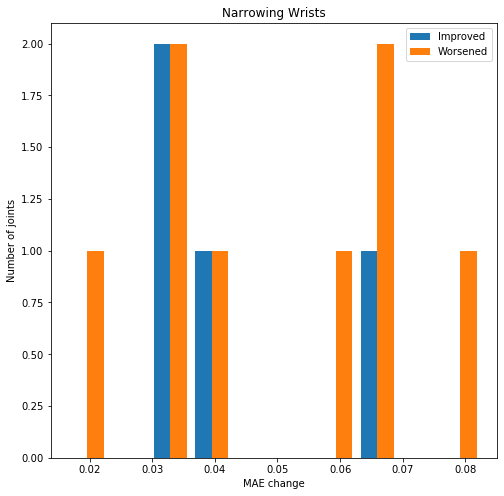

-------
-------
Narrowing Feet
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.031134886991070664 (+/-:  0.024301056989524 )
Mean Score worsen: 0.06147127169305863 (+/-:  0.033160197273917454 )


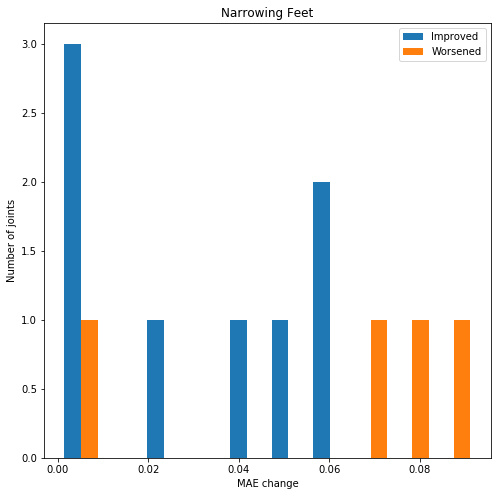

-------
-------
Erosion Hands
Score improved on 0.55% of joints
Mean Score improvement: -0.030718454082492793 (+/-:  0.029755842653069717 )
Mean Score worsen: 0.021627920909204346 (+/-:  0.028159604724670384 )


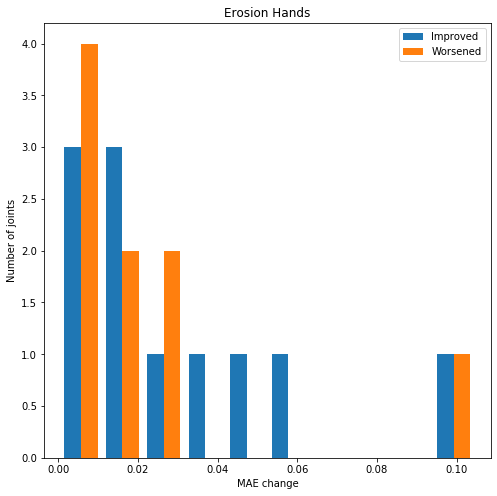

-------
-------
Erosion Wrists
Score improved on 0.5833333333333334% of joints
Mean Score improvement: -0.013119919211112012 (+/-:  0.007500225809221876 )
Mean Score worsen: 0.04416859173215927 (+/-:  0.03566123146787898 )


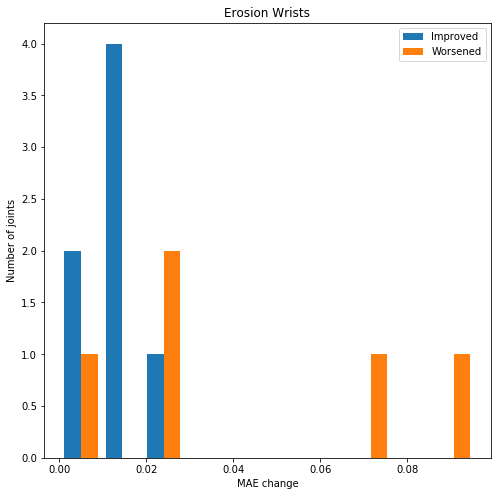

-------
-------
Erosion Feet
Score improved on 0.9166666666666666% of joints
Mean Score improvement: -0.03677851989453018 (+/-:  0.02522325890662954 )
Mean Score worsen: 0.028839517870674958 (+/-:  0.0 )


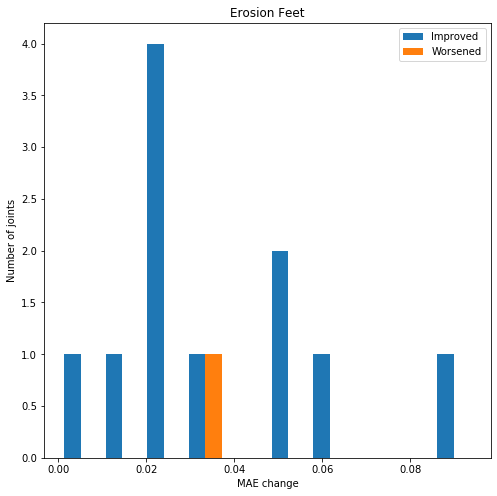

-------


In [11]:
print_report(truth, adam_no_weights_reg_output, adam_no_weights_reg_shuffle_hand_pretrain) 

Previous R2: 0.7338888372372045
New R2: 0.7536138834489792
Previous Narrowing R2: 0.8390737621042532
New Narrowing R2: 0.8720853640594071
Previous Erosion R2: 0.5464716734715618
New Erosion R2: 0.5017203755214951
Previous Overall MAE: 10.180528757202884
New Overall MAE: 9.891856627943723
-------
Previous Hand Narrowing R2 0.8715443221138615
New Hand Narrowing R2 0.8715443221138615
-------
Previous Wrist Narrowing R2 0.9112268038684017
New Wrist Narrowing R2 0.9112268038684017
-------
Previous Feet Narrowing R2 0.5716899060468756
New Feet Narrowing R2 0.7910637218549151
-------
Previous Hand Erosion R2 0.5260516463172056
New Hand Erosion R2 0.5260516463172056
-------
Previous Wrist Erosion R2 0.4987444602072888
New Wrist Erosion R2 0.4987444602072888
-------
Previous Feet Erosion R2 0.4513710973348185
New Feet Erosion R2 0.3980965337379455
-------
-------
Overall
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.05250570955483809 (+/-:  0.02968966428482996 )
Mea

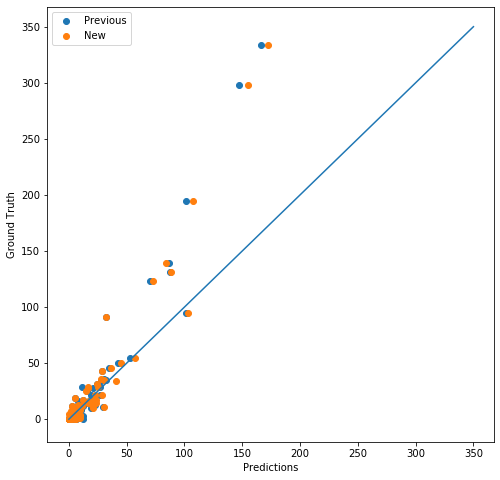

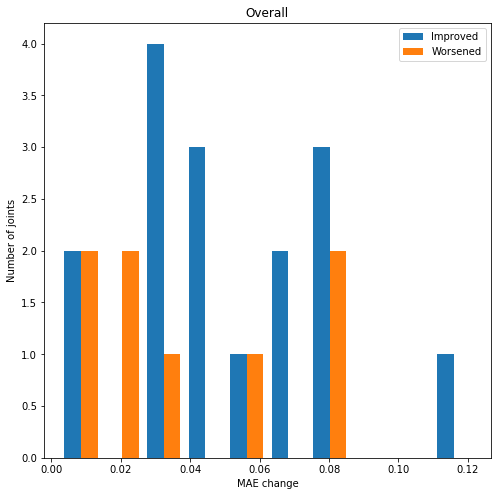

-------
-------
Narrowing Hands
-------
-------
Narrowing Wrists
-------
-------
Narrowing Feet
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.04171788575046735 (+/-:  0.019383393561403586 )
Mean Score worsen: 0.04580933624959511 (+/-:  0.028945723166828793 )


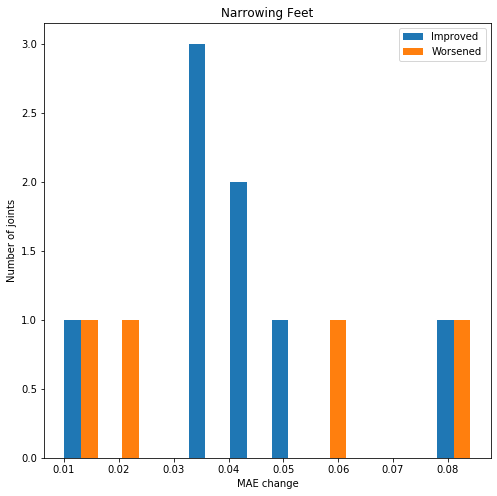

-------
-------
Erosion Hands
-------
-------
Erosion Wrists
-------
-------
Erosion Feet
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.06329353335920883 (+/-:  0.033977670606844985 )
Mean Score worsen: 0.03419260235260364 (+/-:  0.029291177181604306 )


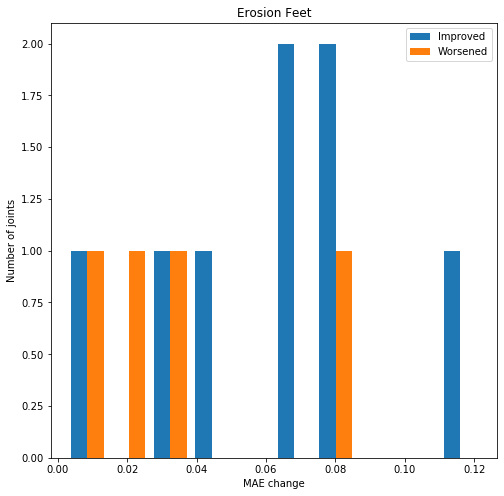

-------


In [10]:
print_report(truth, adam_no_weights_shuffle, adam_no_weights_reg_shuffle_hand_pretrain) 

Previous R2: 0.7141595889726446
New R2: 0.8099294391778697
Previous Narrowing R2: 0.8632838358917424
New Narrowing R2: 0.8730628046855353
Previous Erosion R2: 0.47104570278039537
New Erosion R2: 0.6006009084144632
Previous Overall MAE: 10.139680860068083
New Overall MAE: 11.772728108385902
-------
Previous Hand Narrowing R2 0.9061566325674564
New Hand Narrowing R2 0.8735435813793699
-------
Previous Wrist Narrowing R2 0.9266446755545681
New Wrist Narrowing R2 0.8084343447584205
-------
Previous Feet Narrowing R2 0.5976912110764925
New Feet Narrowing R2 0.6838475082210307
-------
Previous Hand Erosion R2 0.5210499083689656
New Hand Erosion R2 0.6106556337757483
-------
Previous Wrist Erosion R2 0.6542266861600035
New Wrist Erosion R2 0.555979108509397
-------
Previous Feet Erosion R2 0.24800168323233884
New Feet Erosion R2 0.41704335387732816
-------
Score improved on 17 out of 86 joints (0.19767441860465115)
Mean Score improvement: -0.03130529557183252 (+/-:  0.02802125044951761 )
Mean

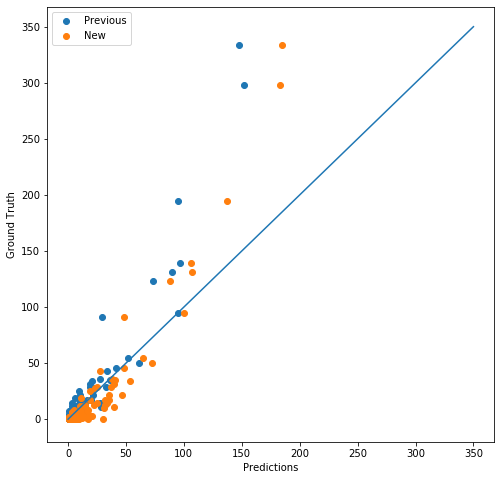

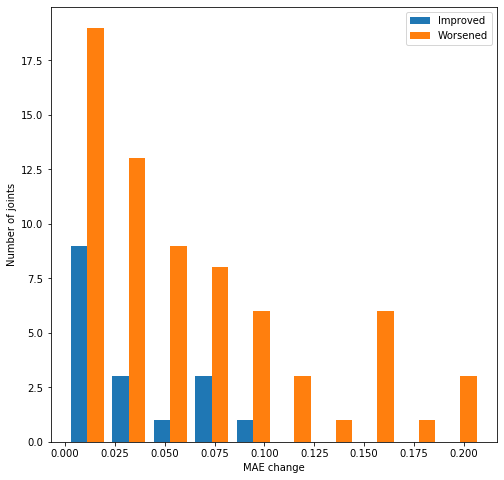

In [57]:
print_report(truth, adam_no_weights_reg_output, adam_no_weights_reg_shuffle_hand_pretrain) 

Previous R2: 0.7650227655992576
New R2: 0.660046077722041
Previous Narrowing R2: 0.8784761360736698
New Narrowing R2: 0.8068473285958129
Previous Erosion R2: 0.5464716734715618
New Erosion R2: 0.4292044431461174
Previous Overall MAE: 9.766242914185252
New Overall MAE: 11.668465146562085
Previous Hand Narrowing R2 0.9057336179193392
New Hand Narrowing R2 0.8561712599244258
Previous Wrist Narrowing R2 0.9112268038684017
New Wrist Narrowing R2 0.8676873841307732
Previous Feet Narrowing R2 0.6495187324727376
New Feet Narrowing R2 0.4574978377166101
Previous Hand Erosion R2 0.5260516463172056
New Hand Erosion R2 0.4955024203220143
Previous Wrist Erosion R2 0.4987444602072888
New Wrist Erosion R2 0.6517466406539302
Previous Feet Erosion R2 0.4513710973348185
New Feet Erosion R2 0.22796951013531364
Score improved on 40 out of 86 joints (0.46511627906976744)
Mean Score improvement: -0.039760374345907776 (+/-:  0.033233161838300974 )
Mean Score worsen: 0.03751361654500964 (+/-:  0.0356697354883

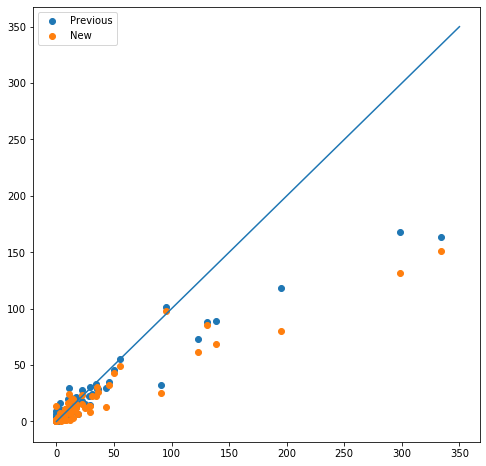

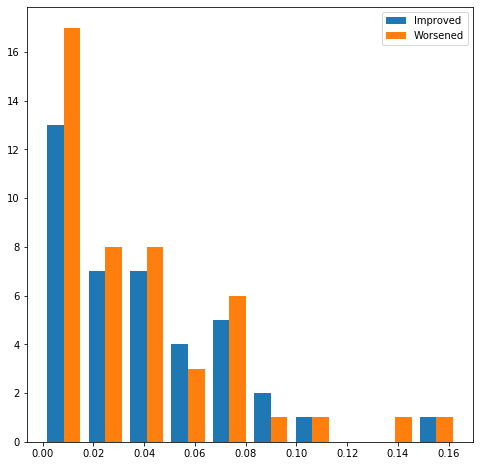

In [33]:
print_report(truth, adam_no_weights_shuffle_comb, adam_no_weights_reg) 